<a href="https://colab.research.google.com/github/joe-jachim/cassava-leaf-classifier/blob/main/fatai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture

import os.path

if not os.path.isfile('/content/data/train.csv'):
  !pip install fastai --upgrade
  !pip install -U git+https://github.com/albu/albumentations --no-cache-dir
  !sudo apt-get install unzip
  !unzip /content/drive/MyDrive/data/cassava-leaf-disease-classification.zip -d /content/data

In [2]:
import pandas as pd
import numpy as np
from fastai.vision.all import *

In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
path = Path('/content/data/')

In [5]:
dls = ImageDataLoaders.from_df(df, path, folder='train_images',
                               item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

In [6]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


SuggestedLRs(lr_min=0.014454397559165954, lr_steep=6.309573450380412e-07)

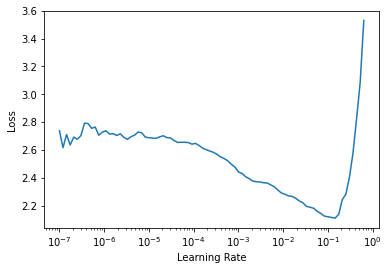

In [7]:
learn.lr_find()

In [8]:
learn.fine_tune(10, 0.014454397559165954)

epoch,train_loss,valid_loss,error_rate,time
0,0.901359,0.743330,0.247955,05:11


epoch,train_loss,valid_loss,error_rate,time
0,0.560686,0.531002,0.187661,05:14
1,0.540173,0.530054,0.170133,05:14
2,0.533546,0.494747,0.172237,05:18
3,0.487140,0.575494,0.170367,05:17
4,0.453630,0.439983,0.147932,05:13
5,0.399234,0.438709,0.149801,05:14
6,0.373801,0.400128,0.135312,05:14
7,0.358438,0.386344,0.127600,05:12
8,0.316398,0.390300,0.126431,05:14
9,0.297166,0.390615,0.125730,05:14
